# TIPS PREDICTION

In [1]:
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
import seaborn as sns   # for data visualisation
import matplotlib.pyplot as plt   #for plotting graph
%matplotlib inline 
#matplotlib inline ensures command in cells bellow the cell that outputs a plot does not affect the plot
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
import warnings   # to ignore warnings

#import all libraries and modules at the beginning of the code

In [2]:
tips = pd.read_csv("tips.csv")

In [3]:
tips.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6


In [4]:
tips.profile_report()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
le = LabelEncoder() #For transforming nominal categorical to numeric
tips_new= tips.copy()
tips_new['gender'] = le.fit_transform(tips_new['gender'])
tips_new['gender'].unique()

array([1, 0])

In [6]:
le = LabelEncoder() #For transforming nominal categorical to numeric
tips_new= tips.copy()
tips_new['smoker'] = le.fit_transform(tips_new['smoker'])
tips_new['smoker'].unique()

array([0, 1])

In [7]:
le = LabelEncoder() #For transforming nominal categorical to numeric
tips_new= tips.copy()
tips_new['time'] = le.fit_transform(tips_new['time'])
tips_new['time'].unique()

array([1, 0])

In [8]:
le = LabelEncoder() #For transforming nominal categorical to numeric
tips_new= tips.copy()
tips_new['day'] = le.fit_transform(tips_new['day'])
tips_new['day'].unique()

array([4, 3, 1, 2, 6, 5, 0])

In [9]:
tips.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6


In [10]:
tips['day'].value_counts()

Sat     165
Sun     140
Thur    134
Fri      79
Tues     78
Mon      75
Wed      73
Name: day, dtype: int64

In [11]:
tips["gender"]. replace({'Male':1,'Female':0}, inplace = True)

In [12]:
tips["smoker"]. replace({'No':0,'Yes':1}, inplace = True)

In [13]:
tips["day"]. replace({'Sat':4,'Sun':3, 'Thur':1,'Fri':2,'Tues':6,'Mon':5,'Wed':0}, inplace = True)

In [14]:
tips["time"]. replace({'Lunch':1,'Dinner':0}, inplace = True)

In [15]:
tips.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,1,0,1,1,1
1,2727.18,259.42,0,0,3,0,5
2,1066.02,274.68,0,1,1,0,4
3,3493.45,337.90,0,0,3,0,1
4,3470.56,567.89,1,1,3,1,6


<AxesSubplot:xlabel='gender', ylabel='count'>

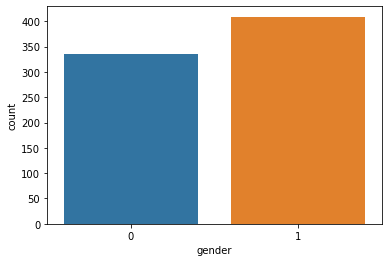

In [16]:
sns.countplot(x='gender', data = tips)

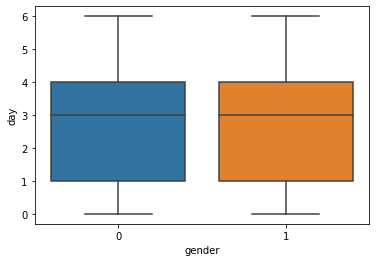

In [17]:
sns.boxplot(y = 'day', x='gender', data = tips);

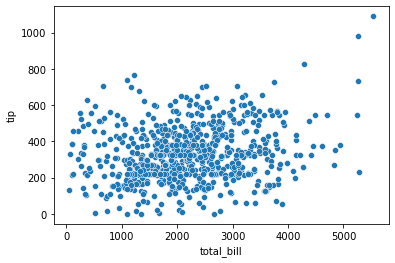

In [18]:
sns.scatterplot(y = 'tip', x='total_bill', data = tips);

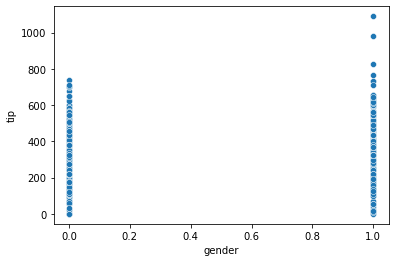

In [19]:
sns.scatterplot(y = 'tip', x='gender', data = tips);

In [20]:
#Split data into features and target
X = tips.drop(['tip'], axis='columns')
y = tips['tip']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1234)

# MODELLING

# LINEAR MODEL

In [22]:
from sklearn.linear_model import LinearRegression
linearmodel = LinearRegression()
linearmodel.fit(X_train,y_train)

LinearRegression()

In [23]:
linearmodel.predict(X_test)

array([362.47779728, 275.71551467, 283.54126375, 340.44253654,
       291.54884307, 284.11994554, 267.32506375, 306.54004935,
       302.16758655, 259.95856244, 291.38421275, 276.1090291 ,
       313.75483369, 375.13684465, 289.74268834, 368.79513993,
       372.07841251, 370.01722017, 249.94609274, 391.42566066,
       296.59682059, 290.21593629, 369.91698379, 377.40127281,
       325.51877348, 318.53173776, 287.12959625, 287.55712679,
       370.76729003, 391.59556693, 306.44293547, 243.58906866,
       381.63267267, 341.22631573, 330.70789177, 340.78863763,
       348.72707484, 284.59616526, 354.61803208, 326.74896865,
       257.8176515 , 328.57124845, 343.96903855, 335.70069213,
       413.59233491, 316.18816508, 345.04858867, 350.01283785,
       324.14468441, 402.8066856 , 328.24496262, 353.64356565,
       374.93776427, 381.65437913, 373.57985777, 319.86599868,
       321.52415835, 337.02046593, 319.74319793, 346.42856699,
       312.32215742, 307.10735258, 344.58321265, 352.76

In [24]:
linearmodel_prediction = linearmodel.predict(X_test)

In [25]:
linearmodel_prediction

array([362.47779728, 275.71551467, 283.54126375, 340.44253654,
       291.54884307, 284.11994554, 267.32506375, 306.54004935,
       302.16758655, 259.95856244, 291.38421275, 276.1090291 ,
       313.75483369, 375.13684465, 289.74268834, 368.79513993,
       372.07841251, 370.01722017, 249.94609274, 391.42566066,
       296.59682059, 290.21593629, 369.91698379, 377.40127281,
       325.51877348, 318.53173776, 287.12959625, 287.55712679,
       370.76729003, 391.59556693, 306.44293547, 243.58906866,
       381.63267267, 341.22631573, 330.70789177, 340.78863763,
       348.72707484, 284.59616526, 354.61803208, 326.74896865,
       257.8176515 , 328.57124845, 343.96903855, 335.70069213,
       413.59233491, 316.18816508, 345.04858867, 350.01283785,
       324.14468441, 402.8066856 , 328.24496262, 353.64356565,
       374.93776427, 381.65437913, 373.57985777, 319.86599868,
       321.52415835, 337.02046593, 319.74319793, 346.42856699,
       312.32215742, 307.10735258, 344.58321265, 352.76

In [26]:
from sklearn import metrics

In [27]:
MSE = metrics.mean_squared_error(y_test, linearmodel_prediction)

In [28]:
MSE

20297.892163850272

In [29]:
np.sqrt(MSE)

142.470671240962

# RANDOM FOREST REGRESSOR

In [30]:
from sklearn.ensemble import RandomForestRegressor
randomodel = RandomForestRegressor()
randomodel.fit(X_train,y_train)

RandomForestRegressor()

In [31]:
randomodel.predict(X_test)

array([335.6655, 438.5397, 299.9135, 271.6607, 234.7969, 268.2708,
       303.4887, 303.3688, 343.8405, 396.651 , 314.3124, 293.0683,
       316.1109, 338.5976, 321.3211, 323.2286, 415.0066, 401.5451,
       344.3746, 456.6991, 210.3264, 363.1226, 363.8638, 348.2441,
       209.2255, 329.2781, 355.6561, 288.6538, 399.1035, 378.3717,
       304.6877, 269.3935, 417.3937, 238.9498, 262.1559, 347.1105,
       389.9257, 301.5267, 319.3046, 252.8146, 381.2493, 268.6632,
       428.9695, 337.5839, 415.2464, 277.5249, 389.6423, 263.9217,
       270.5598, 359.1441, 332.8424, 367.7115, 352.4842, 455.5328,
       253.5449, 312.2959, 351.4814, 304.1972, 250.2313, 319.6643,
       351.0999, 391.5171, 407.333 , 372.9108, 311.6637, 244.3998,
       269.3717, 359.046 , 383.6909, 788.7676, 281.1982, 250.8962,
       896.634 , 397.741 , 384.9662, 326.6621, 319.4136, 435.1934,
       388.0836, 394.7326, 199.7316, 343.2737, 331.3273, 143.0189,
       404.2156, 296.8942, 355.7215, 338.4341, 252.0734, 315.9

In [32]:
randomodel_prediction = randomodel.predict(X_test)
randomodel_prediction

array([335.6655, 438.5397, 299.9135, 271.6607, 234.7969, 268.2708,
       303.4887, 303.3688, 343.8405, 396.651 , 314.3124, 293.0683,
       316.1109, 338.5976, 321.3211, 323.2286, 415.0066, 401.5451,
       344.3746, 456.6991, 210.3264, 363.1226, 363.8638, 348.2441,
       209.2255, 329.2781, 355.6561, 288.6538, 399.1035, 378.3717,
       304.6877, 269.3935, 417.3937, 238.9498, 262.1559, 347.1105,
       389.9257, 301.5267, 319.3046, 252.8146, 381.2493, 268.6632,
       428.9695, 337.5839, 415.2464, 277.5249, 389.6423, 263.9217,
       270.5598, 359.1441, 332.8424, 367.7115, 352.4842, 455.5328,
       253.5449, 312.2959, 351.4814, 304.1972, 250.2313, 319.6643,
       351.0999, 391.5171, 407.333 , 372.9108, 311.6637, 244.3998,
       269.3717, 359.046 , 383.6909, 788.7676, 281.1982, 250.8962,
       896.634 , 397.741 , 384.9662, 326.6621, 319.4136, 435.1934,
       388.0836, 394.7326, 199.7316, 343.2737, 331.3273, 143.0189,
       404.2156, 296.8942, 355.7215, 338.4341, 252.0734, 315.9

In [33]:
MSE = metrics.mean_squared_error(y_test, randomodel_prediction)
MSE

24537.4887084096

In [34]:
np.sqrt(MSE)

156.64446593611152

# EXTREME XGBOOST GRADIENT

In [35]:
from xgboost import XGBRegressor
xgboostmodel = XGBRegressor(use_label_encoder = False)
xgboostmodel.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', use_label_encoder=False,
             validate_parameters=1, verbosity=None)

In [36]:
xgboostmodel.predict(X_test)

C:\Users\OLADEJI\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([314.95673, 396.59363, 311.03348, 291.36426, 215.08038, 391.44812,
       204.82048, 342.01608, 324.0033 , 411.946  , 289.5254 , 215.44789,
       299.53296, 307.8205 , 340.8989 , 329.19232, 289.31137, 537.56665,
       239.55016, 431.7686 , 204.3338 , 426.66617, 358.53314, 415.21014,
       149.66663, 435.50992, 423.10385, 302.04263, 395.2217 , 332.5478 ,
       253.4836 , 241.50314, 512.2944 , 169.53523, 289.75977, 218.05807,
       368.08453, 320.4081 , 386.4902 , 196.17845, 402.18753, 170.32228,
       468.41125, 420.6873 , 392.45056, 258.7705 , 407.62552, 252.75656,
       224.63206, 290.16336, 298.77682, 359.2973 , 423.11273, 429.36005,
       170.91913, 341.92932, 410.0115 , 281.61505, 291.0172 , 391.78738,
       339.82925, 408.63065, 397.542  , 301.73026, 313.2933 , 372.39804,
       214.98895, 460.74142, 489.59634, 580.9722 , 284.8122 , 355.74548,
       915.44806, 506.48392, 342.093  , 246.78004, 312.60495, 379.22174,
       421.0715 , 369.35233,  91.78403, 437.28308, 

In [37]:
xgboostmodel_prediction = xgboostmodel.predict(X_test)
xgboostmodel_prediction

array([314.95673, 396.59363, 311.03348, 291.36426, 215.08038, 391.44812,
       204.82048, 342.01608, 324.0033 , 411.946  , 289.5254 , 215.44789,
       299.53296, 307.8205 , 340.8989 , 329.19232, 289.31137, 537.56665,
       239.55016, 431.7686 , 204.3338 , 426.66617, 358.53314, 415.21014,
       149.66663, 435.50992, 423.10385, 302.04263, 395.2217 , 332.5478 ,
       253.4836 , 241.50314, 512.2944 , 169.53523, 289.75977, 218.05807,
       368.08453, 320.4081 , 386.4902 , 196.17845, 402.18753, 170.32228,
       468.41125, 420.6873 , 392.45056, 258.7705 , 407.62552, 252.75656,
       224.63206, 290.16336, 298.77682, 359.2973 , 423.11273, 429.36005,
       170.91913, 341.92932, 410.0115 , 281.61505, 291.0172 , 391.78738,
       339.82925, 408.63065, 397.542  , 301.73026, 313.2933 , 372.39804,
       214.98895, 460.74142, 489.59634, 580.9722 , 284.8122 , 355.74548,
       915.44806, 506.48392, 342.093  , 246.78004, 312.60495, 379.22174,
       421.0715 , 369.35233,  91.78403, 437.28308, 

In [38]:
MSE = metrics.mean_squared_error(y_test, xgboostmodel_prediction)
MSE

29415.067004714405

In [39]:
np.sqrt(MSE)

171.5082126450929

# SUPPORT VECTOR MACHINE

In [40]:
from sklearn.svm import SVR
svmodel = SVR()
svmodel.fit(X_train,y_train)

SVR()

In [41]:
svmodel.predict(X_test)

array([320.34222642, 294.58941979, 296.97043951, 310.5698854 ,
       299.43120634, 297.99569611, 294.57495876, 302.13222031,
       310.9590368 , 294.89499151, 298.53200953, 294.55676596,
       306.98511782, 319.21131222, 294.17449207, 326.22317956,
       323.13685136, 330.97131799, 294.17905108, 334.03505397,
       295.74411571, 294.19012763, 330.02408261, 325.40362203,
       316.17349257, 318.79608403, 306.34690317, 302.04927418,
       331.81531877, 330.32566588, 303.10105389, 294.72647803,
       328.86139838, 309.47090901, 321.29628629, 320.91709495,
       313.45465702, 297.86374891, 309.91722038, 317.53517604,
       294.7700482 , 309.67355018, 311.6786923 , 318.796109  ,
       334.35768055, 300.86249949, 308.40540918, 322.84892554,
       306.04079961, 332.60527556, 317.3129294 , 313.04115   ,
       325.71284316, 329.19948096, 332.62058462, 316.09165798,
       301.01824638, 331.36835227, 303.20540859, 312.27665749,
       309.32925131, 304.72908608, 315.37371584, 320.24

In [42]:
svmodel_prediction = svmodel.predict(X_test)
svmodel_prediction

array([320.34222642, 294.58941979, 296.97043951, 310.5698854 ,
       299.43120634, 297.99569611, 294.57495876, 302.13222031,
       310.9590368 , 294.89499151, 298.53200953, 294.55676596,
       306.98511782, 319.21131222, 294.17449207, 326.22317956,
       323.13685136, 330.97131799, 294.17905108, 334.03505397,
       295.74411571, 294.19012763, 330.02408261, 325.40362203,
       316.17349257, 318.79608403, 306.34690317, 302.04927418,
       331.81531877, 330.32566588, 303.10105389, 294.72647803,
       328.86139838, 309.47090901, 321.29628629, 320.91709495,
       313.45465702, 297.86374891, 309.91722038, 317.53517604,
       294.7700482 , 309.67355018, 311.6786923 , 318.796109  ,
       334.35768055, 300.86249949, 308.40540918, 322.84892554,
       306.04079961, 332.60527556, 317.3129294 , 313.04115   ,
       325.71284316, 329.19948096, 332.62058462, 316.09165798,
       301.01824638, 331.36835227, 303.20540859, 312.27665749,
       309.32925131, 304.72908608, 315.37371584, 320.24

In [43]:
MSE = metrics.mean_squared_error(y_test, svmodel_prediction)
MSE

19848.6294500964

In [44]:
np.sqrt(MSE)

140.8851640524878

In [45]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreemodel = DecisionTreeRegressor()
DecisionTreemodel.fit(X_train,y_train)

DecisionTreeRegressor()

In [46]:
DecisionTreemodel.predict(X_test)

array([ 277.95,  561.35,  456.71,  478.51,  218.  ,  180.94,  224.54,
        214.73,  475.24,  487.23,  316.1 ,  215.82,  276.86,  227.81,
        383.68,  322.64,  513.39,  250.7 ,  510.12,  545.  ,  170.04,
        156.96,  554.81,  196.2 ,  221.27,  251.79,  223.45,  218.  ,
        415.29,  250.7 ,  327.  ,  215.82,  327.  ,  566.8 ,   14.17,
        421.83,  390.22,  272.5 ,  556.99,  292.12,  380.41,  566.8 ,
        292.12,  158.05,  401.12,  333.54,  331.36,  178.76,  334.63,
        432.73,  140.61,  299.75,  545.  ,  457.8 ,  161.32,  355.34,
        427.28,  585.33,  327.  ,  313.92,  436.  ,  404.39,  381.5 ,
        213.64,  301.93,  251.79,  556.99,  346.62,  492.68,  733.57,
        566.8 ,   23.98, 1090.  ,  381.5 ,  334.63,  248.52,  318.28,
        440.36,  449.08,  269.23,    4.36,  296.48,  602.77,    4.36,
        398.94,  333.54,  223.45,  404.39,  218.  ,  327.  ,  224.54,
        421.83,  381.5 ,  381.5 ,  191.84,  209.28,  337.9 ,  218.  ,
        401.12,  379

In [47]:
DecisionTreemodel_prediction = DecisionTreemodel.predict(X_test)
DecisionTreemodel_prediction

array([ 277.95,  561.35,  456.71,  478.51,  218.  ,  180.94,  224.54,
        214.73,  475.24,  487.23,  316.1 ,  215.82,  276.86,  227.81,
        383.68,  322.64,  513.39,  250.7 ,  510.12,  545.  ,  170.04,
        156.96,  554.81,  196.2 ,  221.27,  251.79,  223.45,  218.  ,
        415.29,  250.7 ,  327.  ,  215.82,  327.  ,  566.8 ,   14.17,
        421.83,  390.22,  272.5 ,  556.99,  292.12,  380.41,  566.8 ,
        292.12,  158.05,  401.12,  333.54,  331.36,  178.76,  334.63,
        432.73,  140.61,  299.75,  545.  ,  457.8 ,  161.32,  355.34,
        427.28,  585.33,  327.  ,  313.92,  436.  ,  404.39,  381.5 ,
        213.64,  301.93,  251.79,  556.99,  346.62,  492.68,  733.57,
        566.8 ,   23.98, 1090.  ,  381.5 ,  334.63,  248.52,  318.28,
        440.36,  449.08,  269.23,    4.36,  296.48,  602.77,    4.36,
        398.94,  333.54,  223.45,  404.39,  218.  ,  327.  ,  224.54,
        421.83,  381.5 ,  381.5 ,  191.84,  209.28,  337.9 ,  218.  ,
        401.12,  379

In [48]:
MSE = metrics.mean_squared_error(y_test, DecisionTreemodel_prediction)
MSE

49673.45629798657

In [49]:
np.sqrt(MSE)

222.8754277572711

In [50]:
## Models Summary
#Deployment

In [51]:
#Save model to file
import pickle
pickle.dump(svmodel, open("svmodel.pickle.dat", "wb"))
print("Save model to: svmodel.pickle.dat")

Save model to: svmodel.pickle.dat


In [52]:
#load model from file
loaded_model = pickle.load(open("svmodel.pickle.dat", "rb"))
print("Loaded model from: svmodel.pickle.dat")

Loaded model from: svmodel.pickle.dat


In [56]:
#make predictions for test data
predictions = loaded_model.predict(X_test)

In [57]:
#evaluate predictions
from sklearn.metrics import r2_score
r2_score_metrics = r2_score(y_test, predictions)
r2_score_metrics

0.009258706631673608